# Kaplan-Meier, Nelson-Aalen, and parametric model

In [1]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

print(df.head())

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [2]:
T = df['T']
E = df['E']

In [3]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

<Axes: xlabel='timeline'>

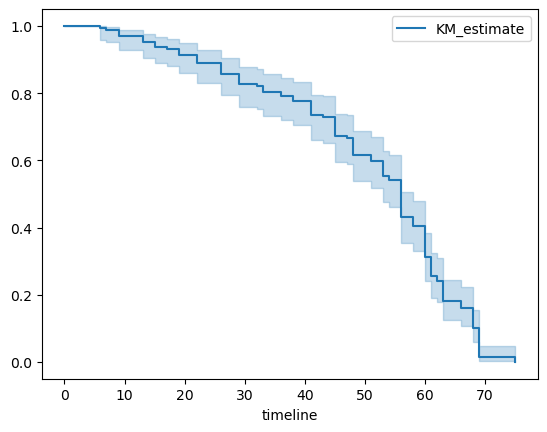

In [4]:
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

<Axes: xlabel='timeline'>

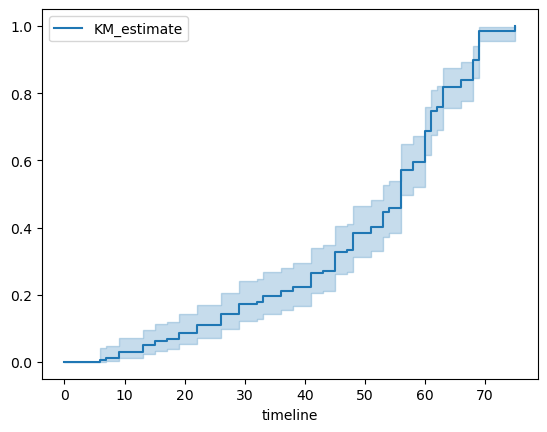

In [5]:
kmf.plot_cumulative_density()

In [6]:
kmf.fit(T, E, timeline=range(0, 100, 2))

kmf.survival_function_   # index is now the same as range(0, 100, 2)
kmf.confidence_interval_ # index is now the same as range(0, 100, 2)

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
2.0,1.000000,1.000000
4.0,1.000000,1.000000
6.0,0.957254,0.999134
8.0,0.951834,0.996917
10.0,0.927613,0.987068
12.0,0.927613,0.987068
14.0,0.903821,0.975031
16.0,0.888437,0.966342
18.0,0.880865,0.961853


In [7]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

<Axes: >

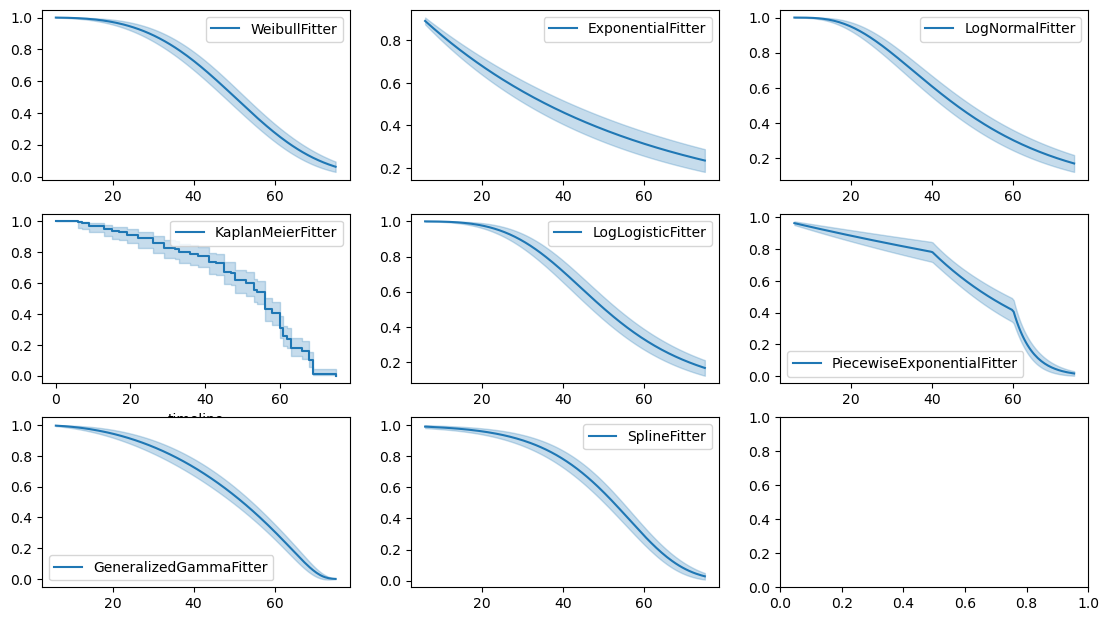

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

fig, axes = plt.subplots(3, 3, figsize=(13.5, 7.5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
sf = SplineFitter(np.percentile(T.loc[E.astype(bool)], [0, 50, 100])).fit(T, E, label='SplineFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[2][0])
sf.plot_survival_function(ax=axes[2][1])

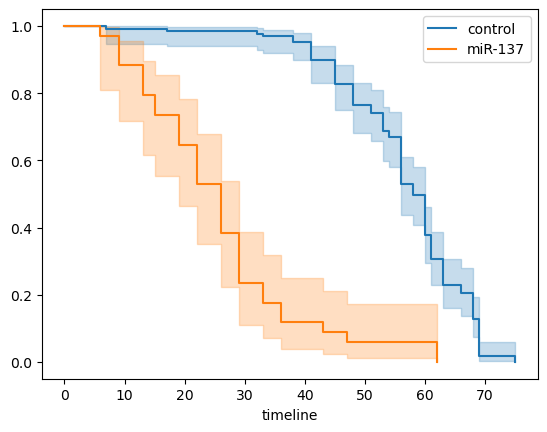

In [9]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot_survival_function()

kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot_survival_function(ax=ax)

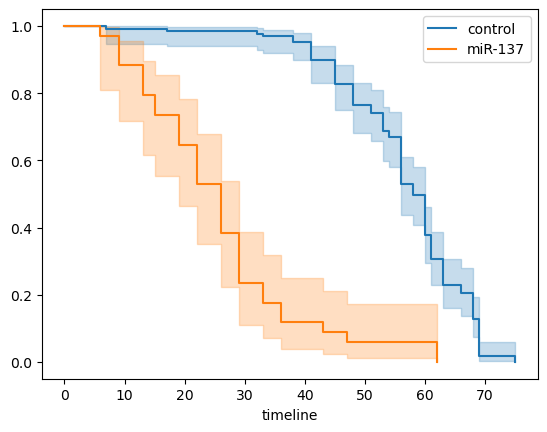

In [10]:
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df["T"], grouped_df["E"], label=name)
    kmf.plot_survival_function(ax=ax)

In [11]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 163 total observations, 7 right-censored observations>

In [12]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(T, E)
print(table.head())

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       163      163
6.0             1         1         0         0      163
7.0             2         1         1         0      162
9.0             3         3         0         0      160
13.0            3         3         0         0      157
